## Data Exploration of San Francisco airbnb data
Data found here: http://insideairbnb.com/get-the-data.html

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 50

import pprint
pp = pprint.PrettyPrinter(indent=2)

In [2]:
# First we read in the data from the csv
SF_data = pd.read_csv("airbnb_data/sf_listings.csv")
# print("Shape: ", SF_data.shape)
SF_data.head(2)

/Users/Eric/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11187767,https://www.airbnb.com/rooms/11187767,20160702162156,2016-07-02,Huge Seacliff Penthouse With Views,Amazing views from this immense 3 bedroom/ 2 b...,"Spacious patio deck, library with over 300 mov...",Amazing views from this immense 3 bedroom/ 2 b...,none,"The neighborhood includes Legion of Honor, Sut...",We require a separate rental agreement to be s...,Public Transportation including Muni and the B...,Guests have access to the entire flat includin...,I am available 24 hours a day during your stay.,"1. Smoking is NOT allowed in the Property, Com...",https://a2.muscache.com/im/pictures/e8652800-a...,https://a2.muscache.com/im/pictures/e8652800-a...,https://a2.muscache.com/im/pictures/e8652800-a...,https://a2.muscache.com/im/pictures/e8652800-a...,58242037,https://www.airbnb.com/users/show/58242037,Jonathan,2016-02-10,"San Francisco, California, United States","Property Manager for Watt Property Management,...",...,NaN,8,31,61,152,2016-07-02,3,2016-03-23,2016-06-25,80.0,9.0,9.0,9.0,9.0,9.0,8.0,t,NaN,SAN FRANCISCO,t,strict,f,f,1,0.88
1,6938818,https://www.airbnb.com/rooms/6938818,20160702162156,2016-07-02,Best Secret in Town,My two story house is located in the quite sid...,The room is spacious and it is on the top leve...,My two story house is located in the quite sid...,none,It is in the city and close to everything. Par...,The summer in San Francisco is cooler than any...,"If you are on budget, the public transportatio...","You will have full access to your room, bathro...",I may not available in person to assist you du...,"1. No pets, no smoking inside the house. 2. F...",https://a2.muscache.com/im/pictures/441473b8-6...,https://a2.muscache.com/im/pictures/441473b8-6...,https://a2.muscache.com/im/pictures/441473b8-6...,https://a2.muscache.com/im/pictures/441473b8-6...,36381578,https://www.airbnb.com/users/show/36381578,Harris,2015-06-21,"San Francisco, California, United States",Retired Accounting Professional. Down to earth...,...,NaN,2,7,8,187,2016-07-02,23,2015-06-27,2016-06-16,91.0,9.0,9.0,10.0,10.0,9.0,9.0,t,S. F. Short-Term Residential Rental Registrati...,SAN FRANCISCO,f,strict,f,f,2,1.85


We see here that we have the information for over 8,000 listings in SF.

Let's explore all of the columns and see what might be useful for the purposes of predicting the price of it

In [3]:
SF_data.keys().tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


From the above it is obvious very many of these columns will not be helpful in our model such as strings such as summary and description as well as the pictures, ids and others.

In [4]:
SF_data.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 
              'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 
              'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 
              'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 
              'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
              'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
              'host_listings_count', 'host_total_listings_count', 'host_verifications', 
              'host_has_profile_pic', 'host_identity_verified', 'security_deposit', 'cleaning_fee', 
              'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 
              'has_availability', 'availability_30', 
              'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 
              'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
              'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
              'review_scores_communication', 'review_scores_location', 'review_scores_value', 
              'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 
              'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 
              'reviews_per_month'], axis=1, inplace=True)

In [5]:
SF_data.head(2)

,id,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price
0,11187767,"El Camino Del Mar, San Francisco, CA 94121, Un...",Richmond District,Seacliff,NaN,San Francisco,CA,94121,San Francisco,"San Francisco, CA",US,United States,37.779685,-122.510472,t,Condominium,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,Hea...",NaN,$400.00,NaN,NaN
1,6938818,"44th Avenue, San Francisco, CA 94121, United S...",Richmond District,Seacliff,NaN,San Francisco,CA,94121,San Francisco,"San Francisco, CA",US,United States,37.780659,-122.505635,t,House,Private room,4,1.0,1.0,2.0,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",NaN,$99.00,$700.00,NaN


In [6]:
SF_data_lean = SF_data.drop(['neighbourhood_group_cleansed', 
              'city', 'state', 'market', 'smart_location', 'country_code', 'country', 
              'is_location_exact', 'property_type', 'room_type', 
              'accommodates', 'weekly_price', 'amenities', 'monthly_price'], axis=1)
SF_data_lean.head(2)

,id,street,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,bathrooms,bedrooms,beds,bed_type,square_feet,price
0,11187767,"El Camino Del Mar, San Francisco, CA 94121, Un...",Richmond District,Seacliff,94121,37.779685,-122.510472,2.0,3.0,3.0,Real Bed,NaN,$400.00
1,6938818,"44th Avenue, San Francisco, CA 94121, United S...",Richmond District,Seacliff,94121,37.780659,-122.505635,1.0,1.0,2.0,Futon,NaN,$99.00


Next step is to attempt one hot encoding neighborhoods, but was very time consuming

In [7]:
SF_data_ohe = SF_data_lean
for elem in SF_data_ohe['neighbourhood_cleansed'].unique():
    SF_data_ohe[str(elem)] = (SF_data_ohe['neighbourhood_cleansed'] == elem).astype(int)
SF_data_ohe = SF_data_ohe.drop(['street','neighbourhood', 'neighbourhood_cleansed','zipcode','bed_type','square_feet','price'],axis=1)
SF_data_ohe.head(10)

,id,latitude,longitude,bathrooms,bedrooms,beds,Seacliff,Haight Ashbury,Outer Mission,Downtown/Civic Center,Diamond Heights,Lakeshore,Russian Hill,Noe Valley,Inner Sunset,Treasure Island/YBI,Outer Richmond,Crocker Amazon,Excelsior,Parkside,Financial District,Ocean View,Mission,West of Twin Peaks,Inner Richmond,Marina,Bayview,Visitacion Valley,Pacific Heights,Presidio Heights,South of Market,Glen Park,Potrero Hill,Castro/Upper Market,Twin Peaks,Bernal Heights,Chinatown,North Beach,Presidio,Nob Hill,Outer Sunset,Western Addition,Golden Gate Park
0,11187767,37.779685,-122.510472,2.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6938818,37.780659,-122.505635,1.0,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9395222,37.781433,-122.505179,1.0,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8388658,37.787664,-122.489152,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7856443,37.782133,-122.492730,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4781448,37.781797,-122.492492,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1427660,37.775236,-122.509137,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8087607,37.775318,-122.511621,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9904485,37.785487,-122.488011,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3168359,37.779319,-122.509635,1.0,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's explore some facts about each neighborhood for SF, such as how many listings were available in each neighborhood and what the average cost of that neighborhood was. We think neighborhood is going to be extremely important in the model prediction because of the old real estate saying: "Location, location, location". When we join this with the Zillow data, neighborhood is going to be an extremely important way of relating the two sets of data.

In [8]:
SF_data['neighbourhood_cleansed'].value_counts()[:5]

Mission                1073
Western Addition        835
South of Market         705
Castro/Upper Market     505
Haight Ashbury          439
Name: neighbourhood_cleansed, dtype: int64

In [9]:
SF_data.price = SF_data.price.replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
avg_neigh_price = SF_data.groupby('neighbourhood_cleansed').\
                          aggregate({'price' : np.mean}).\
                          rename(index=str, columns={"price": "avg_price"}).\
                          sort_values(by='avg_price', ascending=0)
                                                    
avg_neigh_price.head()

,avg_price
neighbourhood_cleansed,
Presidio,609.500000
Presidio Heights,579.945946
Pacific Heights,370.574899
Russian Hill,341.000000
South of Market,340.693617


Next it might be helpful to know the availability of each id, i.e. how much of the last year it was listed as available:

In [10]:
SF_cal = pd.read_csv("airbnb_data/sf_calendar.csv")
print("Shape: ", SF_cal.shape)
SF_cal.head()

('Shape: ', (3145935, 4))


,listing_id,date,available,price
0,11187767,2017-03-12,f,NaN
1,11187767,2017-03-11,f,NaN
2,11187767,2017-03-10,f,NaN
3,11187767,2017-03-09,f,NaN
4,11187767,2017-03-08,f,NaN


We can now go ahead and turn each date into a season, and use this season column to produce price averages and availabilities

In [11]:
#sf_avail = SF_cal.dropna()
findSeason = {1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',\
             8:'Summer',9:'Fall',10:'Fall',11:'Fall',12:'Winter'}
sf_avail = SF_cal
sf_avail['date'] = pd.to_datetime(sf_avail['date'])
sf_avail['Season'] = sf_avail['date'].apply(lambda x: findSeason[x.month])

First we will compute seasonal availability for each property

In [12]:
sf_season_avail = sf_avail.drop(['date','price'],axis=1)

def calc_avail(x):
    vc = x.value_counts()
    if 't' in vc.keys():
        return x.value_counts()['t'] * 1.0 / x.size
    else:
        return 0

sf_season_avail = pd.pivot_table(sf_season_avail, index=['listing_id'], columns=['Season'], aggfunc=calc_avail)
sf_season_avail.head()

available                           
Season          Fall Spring    Summer    Winter
listing_id                                     
958         0.549451    1.0  0.402174  1.000000
5193        0.340659    1.0  0.445652  0.877778
5841        0.813187    1.0  0.336957  1.000000
5858        1.000000    1.0  0.869565  1.000000
7918        1.000000    1.0  1.000000  1.000000

Now we can compute seasonal average price for each listing

In [13]:
sf_prices = sf_avail.dropna().drop(['date','available'],axis=1)
sf_prices['price'] = sf_prices['price'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
sf_prices = pd.pivot_table(sf_prices,index=['listing_id'], columns=['Season'],aggfunc=np.mean)
sf_prices.head(10)

price                                    
Season            Fall      Spring      Summer      Winter
listing_id                                                
958         171.560000  171.695652  171.783784  171.733333
5193        175.000000  160.000000  167.195122  161.518987
5841        183.432432  183.543478  183.903226  183.600000
5858        250.000000  250.000000  250.000000  250.000000
7918         65.000000   65.000000   65.000000   65.000000
8014         60.000000   60.000000   60.000000   60.000000
8142         65.000000   65.000000   65.000000   65.000000
8339        395.000000         NaN  395.000000         NaN
8739        188.695122  410.108696  333.310811  187.800000
8775        344.924242  285.000000  283.743590  285.000000

We now have calculated seasonal features for each listing. In order to use these features, we must join these two tables with our previously collected SF_data

In [14]:
SF_total = SF_data_ohe.set_index(['id'])
SF_total.rename(columns={'id':'listing_id'},inplace=True)
SF_total = SF_total.join(sf_prices)
SF_total = SF_total.join(sf_season_avail)
SF_total.rename(columns={i: i[1] + i[0] for i in SF_total.columns if type(i) == tuple},inplace=True)
SF_total.head()

/Users/Eric/anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:536: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,latitude,longitude,bathrooms,bedrooms,beds,Seacliff,Haight Ashbury,Outer Mission,Downtown/Civic Center,Diamond Heights,Lakeshore,Russian Hill,Noe Valley,Inner Sunset,Treasure Island/YBI,Outer Richmond,Crocker Amazon,Excelsior,Parkside,Financial District,Ocean View,Mission,West of Twin Peaks,Inner Richmond,Marina,Bayview,Visitacion Valley,Pacific Heights,Presidio Heights,South of Market,Glen Park,Potrero Hill,Castro/Upper Market,Twin Peaks,Bernal Heights,Chinatown,North Beach,Presidio,Nob Hill,Outer Sunset,Western Addition,Golden Gate Park,Fallprice,Springprice,Summerprice,Winterprice,Fallavailable,Springavailable,Summeravailable,Winteravailable
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11187767,37.779685,-122.510472,2.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,489.772727,NaN,515.151515,500.000000,0.967033,0.000000,0.358696,0.344444
6938818,37.780659,-122.505635,1.0,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124.200000,126.125000,113.375000,125.804598,0.659341,0.347826,0.086957,0.966667
9395222,37.781433,-122.505179,1.0,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,185.052632,166.304348,166.891892,NaN,0.417582,1.000000,0.402174,0.000000
8388658,37.787664,-122.489152,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
7856443,37.782133,-122.492730,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,513.333333,NaN,400.000000,NaN,0.230769,0.000000,0.021739,0.000000


# Bounding Box Local Dataset Way - To Be Continued next time

We now must be able to use this dataset. But to do so, we need to properly curate the datapoints we use to create a model for a given house we would like to predict seasonal prices for. This requires selecting datapoints from the SF_total table that actually are close by to the location we would like to predict prices for. In essence, we build a local model around a query point q, which consists of (latitude, longitude, bathrooms, bedrooms). We must build the functionality to create the dataset for a local model:

In [15]:
boundDistance = 0.5 # in miles, need to change to latitude, longitude offsets
def latitudeLongitudeOffsets(latitude, miles=boundDistance):
    return (float(miles) / 69.0, float(miles) / (np.cos(np.radians(latitude)) * 69.0))

def distanceBetween(first, second):
    lat1, lat2 = np.radians(first[0]),np.radians(second[0])
    deltaLat = np.radians(second[0] - first[0])
    deltaLon = np.radians(second[1] - first[1])
    a = np.sin(deltaLat / 2) ** 2 + np.cos(lat1) * np.cos(lat2)*np.sin(deltaLon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return 3959.0 * c

def collectDataForQuery(lat,lon):
    # needed to computed latitude longitude offsets for bounding box of [lat+-boundDistance, lon+-boundDistance]
    latDelta, lonDelta = latitudeLongitudeOffsets(lat)
    up, down, left, right = min(lat+latDelta,lat-latDelta), max(lat+latDelta,lat-latDelta), \
    min(lon+lonDelta,lon-lonDelta),max(lon+lonDelta,lon-lonDelta)
    filter = SF_total[(SF_total['latitude'] > up) & (SF_total['latitude'] < down) & (SF_total['longitude'] > left) & (SF_total['longitude'] < right)]
    filter['Distance'] = filter.apply(lambda row: distanceBetween((lat,lon),(row['latitude'],row['longitude'])),axis=1)
    return filter

collectDataForQuery(37.782,-122.492730).head(15)

/Users/Eric/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,latitude,longitude,bathrooms,bedrooms,beds,Seacliff,Haight Ashbury,Outer Mission,Downtown/Civic Center,Diamond Heights,Lakeshore,Russian Hill,Noe Valley,Inner Sunset,Treasure Island/YBI,Outer Richmond,Crocker Amazon,Excelsior,Parkside,Financial District,Ocean View,Mission,West of Twin Peaks,Inner Richmond,Marina,...,Visitacion Valley,Pacific Heights,Presidio Heights,South of Market,Glen Park,Potrero Hill,Castro/Upper Market,Twin Peaks,Bernal Heights,Chinatown,North Beach,Presidio,Nob Hill,Outer Sunset,Western Addition,Golden Gate Park,Fallprice,Springprice,Summerprice,Winterprice,Fallavailable,Springavailable,Summeravailable,Winteravailable,Distance
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8388658,37.787664,-122.489152,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.437441
7856443,37.782133,-122.492730,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,513.333333,NaN,400.000000,NaN,0.230769,0.0,0.021739,0.000000,0.009174
4781448,37.781797,-122.492492,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,327.000000,NaN,NaN,NaN,0.054945,0.0,0.000000,0.000000,0.019144
9904485,37.785487,-122.488011,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.352778
10961737,37.785566,-122.488729,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300.000000,300.000000,300.000000,300.0,1.000000,1.0,1.000000,1.000000,0.329339
1931937,37.781564,-122.494424,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,185.000000,NaN,0.000000,0.0,0.043478,0.000000,0.097315
8411606,37.784886,-122.492872,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110.925926,NaN,115.714286,NaN,0.296703,0.0,0.076087,0.000000,0.199571
589516,37.777855,-122.498965,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155.916667,146.304348,148.128205,147.0,0.527473,1.0,0.423913,0.888889,0.444943
2683857,37.775568,-122.493314,2.0,3.0,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,215.000000,NaN,0.000000,0.0,0.032609,0.000000,0.445601


# OHE Way - MVP

In [16]:
# SF_train = SF_total.drop(['latitude','longitude'],axis=1)
SF_train = SF_total
labels = ['Fallprice','Springprice','Summerprice','Winterprice']
SF_labels = SF_train[labels]
SF_train = SF_train.drop(labels, axis=1)
SF_labels.head()

,Fallprice,Springprice,Summerprice,Winterprice
id,,,,
11187767,489.772727,NaN,515.151515,500.000000
6938818,124.200000,126.125000,113.375000,125.804598
9395222,185.052632,166.304348,166.891892,NaN
8388658,NaN,NaN,NaN,NaN
7856443,513.333333,NaN,400.000000,NaN


We need to efficiently fill these NaNs. For now we will fill them with row averages. We need to remove data points which have NaN for all prices by rejoining with SF_train, dropping NaN rows, and then separating again.

In [17]:
SF_labels = SF_labels.T.fillna(SF_labels.mean(axis=1)).T.dropna()
SF_train[labels] = SF_labels
SF_train = SF_train.dropna()
SF_labels = SF_train[labels]
SF_train = SF_train.drop(labels,axis=1)
SF_train.head()

,latitude,longitude,bathrooms,bedrooms,beds,Seacliff,Haight Ashbury,Outer Mission,Downtown/Civic Center,Diamond Heights,Lakeshore,Russian Hill,Noe Valley,Inner Sunset,Treasure Island/YBI,Outer Richmond,Crocker Amazon,Excelsior,Parkside,Financial District,Ocean View,Mission,West of Twin Peaks,Inner Richmond,Marina,Bayview,Visitacion Valley,Pacific Heights,Presidio Heights,South of Market,Glen Park,Potrero Hill,Castro/Upper Market,Twin Peaks,Bernal Heights,Chinatown,North Beach,Presidio,Nob Hill,Outer Sunset,Western Addition,Golden Gate Park,Fallavailable,Springavailable,Summeravailable,Winteravailable
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11187767,37.779685,-122.510472,2.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.967033,0.000000,0.358696,0.344444
6938818,37.780659,-122.505635,1.0,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.659341,0.347826,0.086957,0.966667
9395222,37.781433,-122.505179,1.0,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.417582,1.000000,0.402174,0.000000
7856443,37.782133,-122.492730,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.230769,0.000000,0.021739,0.000000
4781448,37.781797,-122.492492,2.5,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.054945,0.000000,0.000000,0.000000


Partition data in order to have a validation set for regression model accuracy testing

In [18]:
model_train, model_label = SF_train[:-634], SF_labels[:-634]
model_val, val_label = SF_train[-634:], SF_labels[-634:]

# Linear Regression (Ridge/Lasso/etc.)

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.RidgeCV()
regr.fit(model_train,model_label)
pred = regr.predict(model_val)
print("MSE:", mean_squared_error(pred,val_label))
print("R2:", r2_score(pred,val_label,multioutput='uniform_average'))
print("Variance score:", regr.score(model_val,val_label))
compare = pd.DataFrame()
compare[['FA','SP','SU','WI']] = val_label
compare[['FA_Pred','SP_Pred','SU_Pred','WI_Pred']] = \
pd.DataFrame(pred,index=compare.index)
compare.head(10)

('MSE:', 97544.604211654208)
('R2:', -2.8779083194053197)
('Variance score:', 0.3465268351077419)


,FA,SP,SU,WI,FA_Pred,SP_Pred,SU_Pred,WI_Pred
id,,,,,,,,
5027016,229.722892,206.173913,226.840909,209.000000,90.709772,98.850198,107.641467,80.501771
8320256,300.000000,300.000000,300.000000,300.000000,63.313109,64.812129,73.082268,56.399010
10681956,290.000000,298.244444,306.488889,298.244444,320.525203,325.203360,326.617486,309.266618
4013746,145.000000,145.000000,145.000000,145.000000,73.407979,71.731603,79.202648,62.690514
10595411,145.000000,145.000000,145.000000,145.000000,251.375915,249.411643,256.164585,238.538210
4023930,101.758621,104.589837,107.421053,104.589837,107.848569,110.896366,116.929881,100.042543
4520680,96.857143,80.130435,90.525000,80.155556,165.544965,176.470318,181.691722,154.697804
7207426,306.250000,306.250000,306.250000,306.250000,270.402873,270.433990,275.706812,258.287920
11319787,259.135135,561.149425,557.280000,259.500000,283.656585,291.543363,298.093871,272.480785


# K-NN Regressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor
nns = np.linspace(1,25,25)
best_score,best_n = 0,0
for nn in nns:
    regr = KNeighborsRegressor(n_neighbors=nn)
    regr.fit(model_train,model_label)
    pred = regr.predict(model_val)
    score = regr.score(model_val,val_label)
    if score > best_score:
        best_score,best_n = score, nn
regr = KNeighborsRegressor(n_neighbors=best_n)
regr.fit(model_train,model_label)
pred = regr.predict(model_val)
score = regr.score(model_val,val_label)
print("MSE:", mean_squared_error(pred,val_label))
print("R2:", r2_score(pred,val_label,multioutput='uniform_average'))
print("Variance score:", score)
compare = pd.DataFrame()
compare[['FA','SP','SU','WI']] = val_label
compare[['FA_Pred','SP_Pred','SU_Pred','WI_Pred']] = \
pd.DataFrame(pred,index=compare.index)
compare.head(10)

/Users/Eric/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:131: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]


('MSE:', 106639.85014946629)
('R2:', -3.5793382920781442)
('Variance score:', 0.28559574418282319)


,FA,SP,SU,WI,FA_Pred,SP_Pred,SU_Pred,WI_Pred
id,,,,,,,,
5027016,229.722892,206.173913,226.840909,209.000000,131.876210,142.770652,140.615338,130.568889
8320256,300.000000,300.000000,300.000000,300.000000,97.259259,98.563191,99.867124,98.563191
10681956,290.000000,298.244444,306.488889,298.244444,270.386111,270.269444,270.152778,270.269444
4013746,145.000000,145.000000,145.000000,145.000000,161.984019,159.894353,158.060340,159.638700
10595411,145.000000,145.000000,145.000000,145.000000,212.421920,210.622417,208.822913,210.622417
4023930,101.758621,104.589837,107.421053,104.589837,105.004470,107.351306,109.698142,107.351306
4520680,96.857143,80.130435,90.525000,80.155556,94.928571,104.725000,102.831718,94.708889
7207426,306.250000,306.250000,306.250000,306.250000,239.432265,237.439870,235.447475,237.439870
11319787,259.135135,561.149425,557.280000,259.500000,234.141908,237.966304,235.740933,225.524633


# Tree Regression

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
nes = np.linspace(1,50,50).astype(int)
best_score,best_ne = 0,0
for ne in nes:
    regr = ExtraTreesRegressor(n_estimators=ne)
    regr.fit(model_train,model_label)
    pred = regr.predict(model_val)
    score = regr.score(model_val,val_label)
    if score > best_score:
        best_score,best_ne = score, ne
regr = ExtraTreesRegressor(n_estimators=best_ne)
regr.fit(model_train,model_label)
pred = regr.predict(model_val)
score = regr.score(model_val,val_label)
print("MSE:", mean_squared_error(pred,val_label))
print("R2:", r2_score(pred,val_label,multioutput='uniform_average'))
print("Variance score:", score)
compare = pd.DataFrame()
compare[['FA','SP','SU','WI']] = val_label
compare[['FA_Pred','SP_Pred','SU_Pred','WI_Pred']] = \
pd.DataFrame(pred,index=compare.index)
compare.head(10)

('MSE:', 33148.805576487684)
('R2:', 0.68566024744661624)
('Variance score:', 0.77792872227495835)


,FA,SP,SU,WI,FA_Pred,SP_Pred,SU_Pred,WI_Pred
id,,,,,,,,
5027016,229.722892,206.173913,226.840909,209.000000,162.115372,164.171577,161.973096,160.675294
8320256,300.000000,300.000000,300.000000,300.000000,96.447623,99.647545,103.163538,99.619624
10681956,290.000000,298.244444,306.488889,298.244444,335.086910,362.118212,369.287898,327.888510
4013746,145.000000,145.000000,145.000000,145.000000,131.177118,131.340674,131.533018,131.633405
10595411,145.000000,145.000000,145.000000,145.000000,164.960729,165.211441,165.083236,165.150255
4023930,101.758621,104.589837,107.421053,104.589837,96.746483,95.977376,95.332041,95.745620
4520680,96.857143,80.130435,90.525000,80.155556,167.092641,165.672303,166.789597,165.725103
7207426,306.250000,306.250000,306.250000,306.250000,224.969867,240.544901,243.451396,223.057981
11319787,259.135135,561.149425,557.280000,259.500000,225.923643,236.770531,242.450699,221.113448


### Map Visualization
##### Map density of listings in each ZIP code

In [22]:
SF_zip_counts = SF_data['zipcode'].value_counts()
SF_zip_counts.head()

94110    1286
94114     700
94117     651
94109     646
94103     520
Name: zipcode, dtype: int64

In [23]:
SF_unique_raw = SF_data.zipcode.unique()
SF_unique_clean = []
for z in SF_unique_raw:
    try:
        SF_unique_clean += [int(z[:5])]
    except:
        pass 

In [24]:
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

colors = ['#ffffe0','#ffe3af','#ffc58a','#ffa474','#fa8266','#ed645c','#db4551','#c52940','#aa0e27','#8b0000']    

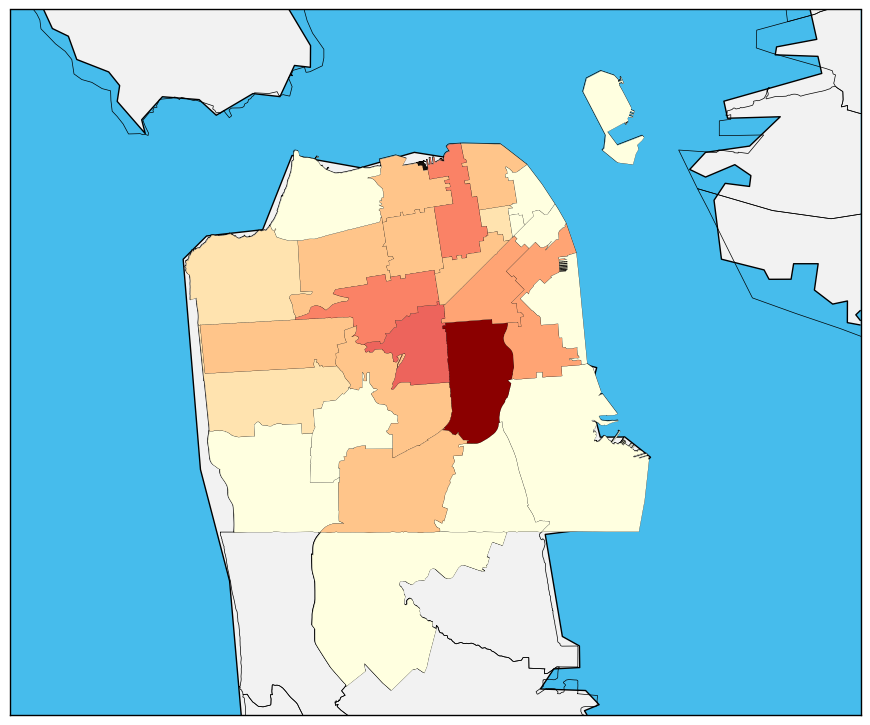

In [27]:
fig = plt.figure(figsize=(11.7,8.3))

plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)

m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
#             lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-122.574463, llcrnrlat=37.658819, urcrnrlon=-122.284698, urcrnrlat=37.848833)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.drawstates()

m.readshapefile('zip_code_data/tl_2010_06_zcta510', 'areas')

from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
 
r = shapefile.Reader("zip_code_data/tl_2010_06_zcta510")
shapes = r.shapes()
records = r.records()
 
colors = ['#ffffe0','#ffe3af','#ffc58a','#ffa474','#fa8266','#ed645c','#db4551','#c52940','#aa0e27','#8b0000']    
for record, shape in zip(records,shapes):
    zip_str = record[1]
    if int(zip_str) not in SF_unique_clean:
        continue
    lons,lats = zip(*shape.points)
    data = np.array(m(lons, lats)).T
 
    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])
 
    lines = LineCollection(segs,antialiaseds=(1,))
    
    if zip_str in SF_zip_counts:
        cnt = SF_zip_counts[zip_str]
        col = colors[cnt//135]
        lines.set_facecolors(col)
    else:
        lines.set_facecolors('w')
    
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)

# plt.savefig('tutorial10.png',dpi=300)
plt.show()

In [ ]:
# import os
# import folium

# print(folium.__version__)

# data = (np.random.normal(size=(100, 3)) *
#         np.array([[1, 1, 1]]) +
#         np.array([[48, 5, 1]])).tolist()
# from folium.plugins import HeatMap

# m = folium.Map([34.055, -118.341], tiles="StamenToner", zoom_start=10)

# m